# Test Heatmap

In [214]:
import pandas as pd
import numpy as np

def magic(n):
  n = int(n)
  if n < 3:
    raise ValueError("Size must be at least 3")
  if n % 2 == 1:
    p = np.arange(1, n+1)
    return n*np.mod(p[:, None] + p - (n+3)//2, n) + np.mod(p[:, None] + 2*p-2, n) + 1
  elif n % 4 == 0:
    J = np.mod(np.arange(1, n+1), 4) // 2
    K = J[:, None] == J
    M = np.arange(1, n*n+1, n)[:, None] + np.arange(n)
    M[K] = n*n + 1 - M[K]
  else:
    p = n//2
    M = magic(p)
    M = np.block([[M, M+2*p*p], [M+3*p*p, M+p*p]])
    i = np.arange(p)
    k = (n-2)//4
    j = np.concatenate((np.arange(k), np.arange(n-k+1, n)))
    M[np.ix_(np.concatenate((i, i+p)), j)] = M[np.ix_(np.concatenate((i+p, i)), j)]
    M[np.ix_([k, k+p], [0, k])] = M[np.ix_([k+p, k], [0, k])]
  return M 

In [186]:
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# 提高 jupyter notebook 的圖形顯示解析度
%config InlineBackend.figure_format = 'retina'

,0,1,2
0,8,1,6
1,3,5,7
2,4,9,2


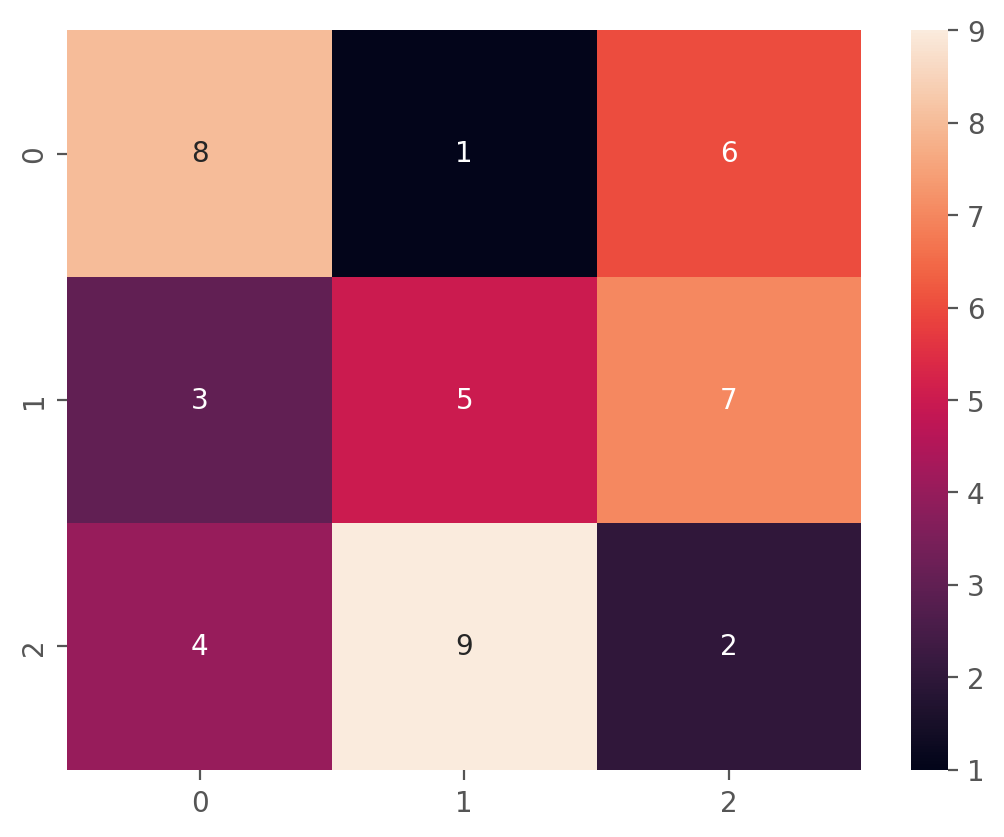

In [187]:
mat = magic(3)
display(pd.DataFrame(mat))
sns.heatmap(mat, annot=True, fmt='.3g')
plt.show()

In [188]:
def mask(size, mode='lower', diag=True):
    if mode == 'lower':  # 保留下三角（遮蔽上三角）
        mask = np.ones((size, size))
        if diag:  # 保留對角線
            for i in range(size):
                for j in range(i+1):
                    mask[i][j] = 0
        else:  # 遮蔽對角線
            for i in range(1, 3):
                for j in range(i):
                    mask[i][j] = 0
    elif mode == 'upper':  # 保留上三角（遮蔽下三角）
        mask = np.zeros((size, size))
        if diag:  # 保留對角線
            for i in range(1, 3):
                for j in range(i):
                    mask[i][j] = 1
        else:  # 遮蔽對角線
            for i in range(3):
                for j in range(i+1):
                    mask[i][j] = 1
    else:
        print(f"Warning: mask() has no option '{mode}' for argument: 'mode'.")
        print("Please specify 'upper' or 'lower' instead.")
        mask = np.zeros((size, size))
    return mask

display(mask(3))
display(mask(3, diag=False))
display(mask(3, mode='upper'))
display(mask(3, mode='upper', diag=False))
display(mask(3, mode='upperd', diag=False))

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 1.]])

Please specify 'upper' or 'lower' instead.


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

,B1,B2,B3
B1,8,0,0
B2,3,5,0
B3,4,9,2


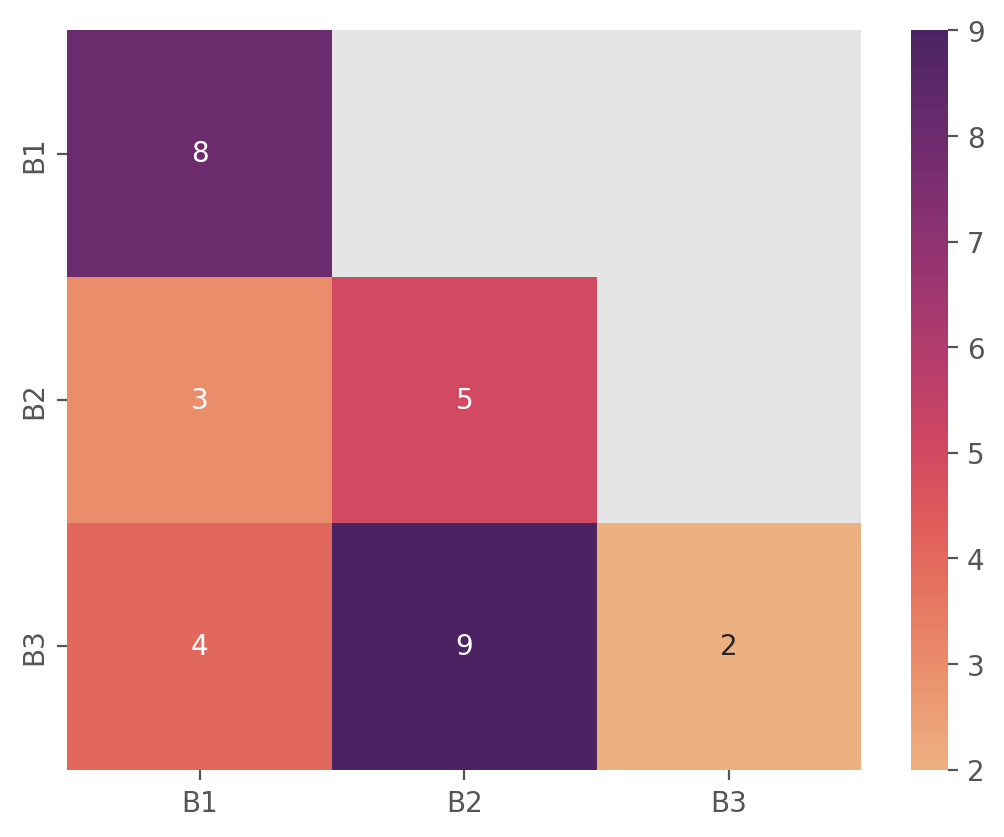

In [189]:
ltmat = np.tril(mat)
ltmat = pd.DataFrame(ltmat,
             index=['B1','B2','B3'],
             columns=['B1','B2','B3'])
display(ltmat)
ax = sns.heatmap(ltmat, annot=True, fmt='.3g', mask=mask(3), cmap='flare')
plt.show()

,B1,B2,B3
B1,8,3,4
B2,0,5,9
B3,0,0,2


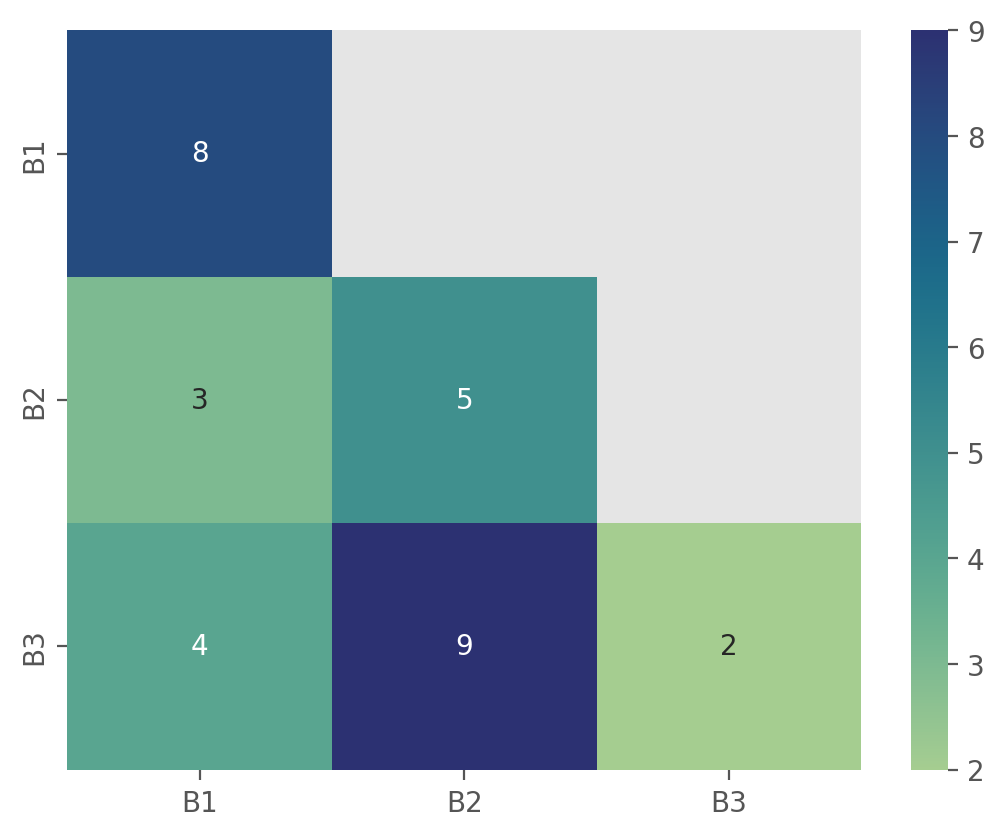

In [190]:
# utmat = ltmat.T
utmat = np.triu(mat.T)
utmat = pd.DataFrame(utmat,
             index=['B1','B2','B3'],
             columns=['B1','B2','B3'])
display(utmat)
ax = sns.heatmap(utmat.T, annot=True, fmt='.3g', mask=mask(3), cmap='crest')
plt.show()

# Test pd.concat()

In [215]:
devices = ['qc01','qc02','qc03']
schemes = ['B3','B7','B8']
dfs = []
testpath = [
    '/home/wmnlab/D/database/2023-02-04#1/_Bandlock_Udp_B3_B7_B8_RM500Q/qc01/#01/data/udp_dnlk_loss_latency.csv',
    '/home/wmnlab/D/database/2023-02-04#1/_Bandlock_Udp_B3_B7_B8_RM500Q/qc02/#01/data/udp_dnlk_loss_latency.csv',
    '/home/wmnlab/D/database/2023-02-04#1/_Bandlock_Udp_B3_B7_B8_RM500Q/qc03/#01/data/udp_dnlk_loss_latency.csv',
]
for i, (dev, schm) in enumerate(zip(devices, schemes)):
    dfs.append(pd.read_csv(testpath[i]))

In [216]:
for i, (dev, schm) in enumerate(zip(devices, schemes)):
    display(dfs[i])

,sequence.number,Timestamp,Timestamp_epoch,lost,excl,latency,transmit.time,transmit.time_epoch,arrival.time,arrival.time_epoch
0,10001,2023-02-04 16:16:36.846746,1.675499e+09,False,False,0.008288,2023-02-04 16:16:36.846760,1.675499e+09,2023-02-04 16:16:36.855034,1.675499e+09
1,10002,2023-02-04 16:16:36.848746,1.675499e+09,False,False,0.011733,2023-02-04 16:16:36.848758,1.675499e+09,2023-02-04 16:16:36.860479,1.675499e+09
2,10003,2023-02-04 16:16:36.850746,1.675499e+09,False,False,0.009779,2023-02-04 16:16:36.850755,1.675499e+09,2023-02-04 16:16:36.860525,1.675499e+09
3,10004,2023-02-04 16:16:36.852746,1.675499e+09,False,False,0.007780,2023-02-04 16:16:36.852756,1.675499e+09,2023-02-04 16:16:36.860526,1.675499e+09
4,10005,2023-02-04 16:16:36.854747,1.675499e+09,False,False,0.005780,2023-02-04 16:16:36.854756,1.675499e+09,2023-02-04 16:16:36.860527,1.675499e+09
...,...,...,...,...,...,...,...,...,...,...
264515,274516,2023-02-04 16:25:25.901468,1.675499e+09,False,False,0.048541,2023-02-04 16:25:25.901475,1.675499e+09,2023-02-04 16:25:25.950009,1.675499e+09
264516,274517,2023-02-04 16:25:25.903468,1.675499e+09,False,False,0.052752,2023-02-04 16:25:25.903475,1.675499e+09,2023-02-04 16:25:25.956220,1.675499e+09
264517,274518,2023-02-04 16:25:25.905468,1.675499e+09,False,False,0.056539,2023-02-04 16:25:25.905475,1.675499e+09,2023-02-04 16:25:25.962007,1.675499e+09
264518,274519,2023-02-04 16:25:25.907468,1.675499e+09,False,False,0.054542,2023-02-04 16:25:25.907475,1.675499e+09,2023-02-04 16:25:25.962010,1.675499e+09


,sequence.number,Timestamp,Timestamp_epoch,lost,excl,latency,transmit.time,transmit.time_epoch,arrival.time,arrival.time_epoch
0,10001,2023-02-04 16:16:36.846746,1.675499e+09,False,False,0.005360,2023-02-04 16:16:36.846765,1.675499e+09,2023-02-04 16:16:36.852106,1.675499e+09
1,10002,2023-02-04 16:16:36.848746,1.675499e+09,False,False,0.003361,2023-02-04 16:16:36.848761,1.675499e+09,2023-02-04 16:16:36.852107,1.675499e+09
2,10003,2023-02-04 16:16:36.850746,1.675499e+09,False,False,0.006130,2023-02-04 16:16:36.850758,1.675499e+09,2023-02-04 16:16:36.856876,1.675499e+09
3,10004,2023-02-04 16:16:36.852746,1.675499e+09,False,False,0.009315,2023-02-04 16:16:36.852759,1.675499e+09,2023-02-04 16:16:36.862061,1.675499e+09
4,10005,2023-02-04 16:16:36.854747,1.675499e+09,False,False,0.007356,2023-02-04 16:16:36.854760,1.675499e+09,2023-02-04 16:16:36.862103,1.675499e+09
...,...,...,...,...,...,...,...,...,...,...
264515,274516,2023-02-04 16:25:25.901468,1.675499e+09,False,False,0.051039,2023-02-04 16:25:25.901478,1.675499e+09,2023-02-04 16:25:25.952507,1.675499e+09
264516,274517,2023-02-04 16:25:25.903468,1.675499e+09,False,False,0.055100,2023-02-04 16:25:25.903479,1.675499e+09,2023-02-04 16:25:25.958568,1.675499e+09
264517,274518,2023-02-04 16:25:25.905468,1.675499e+09,False,False,0.053103,2023-02-04 16:25:25.905478,1.675499e+09,2023-02-04 16:25:25.958571,1.675499e+09
264518,274519,2023-02-04 16:25:25.907468,1.675499e+09,False,False,0.057169,2023-02-04 16:25:25.907479,1.675499e+09,2023-02-04 16:25:25.964637,1.675499e+09


,sequence.number,Timestamp,Timestamp_epoch,lost,excl,latency,transmit.time,transmit.time_epoch,arrival.time,arrival.time_epoch
0,10001,2023-02-04 16:16:36.846746,1.675499e+09,False,False,0.006068,2023-02-04 16:16:36.846769,1.675499e+09,2023-02-04 16:16:36.852814,1.675499e+09
1,10002,2023-02-04 16:16:36.848746,1.675499e+09,False,False,0.009598,2023-02-04 16:16:36.848765,1.675499e+09,2023-02-04 16:16:36.858344,1.675499e+09
2,10003,2023-02-04 16:16:36.850746,1.675499e+09,False,False,0.013595,2023-02-04 16:16:36.850762,1.675499e+09,2023-02-04 16:16:36.864341,1.675499e+09
3,10004,2023-02-04 16:16:36.852746,1.675499e+09,False,False,0.011639,2023-02-04 16:16:36.852763,1.675499e+09,2023-02-04 16:16:36.864385,1.675499e+09
4,10005,2023-02-04 16:16:36.854747,1.675499e+09,False,False,0.009640,2023-02-04 16:16:36.854763,1.675499e+09,2023-02-04 16:16:36.864387,1.675499e+09
...,...,...,...,...,...,...,...,...,...,...
264592,274593,2023-02-04 16:25:26.055475,1.675499e+09,False,False,0.050201,2023-02-04 16:25:26.055489,1.675499e+09,2023-02-04 16:25:26.105676,1.675499e+09
264593,274594,2023-02-04 16:25:26.057475,1.675499e+09,False,False,0.054151,2023-02-04 16:25:26.057489,1.675499e+09,2023-02-04 16:25:26.111626,1.675499e+09
264594,274595,2023-02-04 16:25:26.059475,1.675499e+09,False,False,0.052158,2023-02-04 16:25:26.059489,1.675499e+09,2023-02-04 16:25:26.111633,1.675499e+09
264595,274596,2023-02-04 16:25:26.061475,1.675499e+09,False,False,0.050160,2023-02-04 16:25:26.061490,1.675499e+09,2023-02-04 16:25:26.111635,1.675499e+09


In [217]:
df1 = dfs[0].head(5)
df2 = dfs[1].head(7)
df3 = dfs[2].head(7)

df2 = df2.drop([0,3], axis=0)
df3 = df3.drop([4,6], axis=0)

df1 = df1.set_index('sequence.number')
df2 = df2.set_index('sequence.number')
df3 = df3.set_index('sequence.number')

_dfs = [df1, df2, df3]
for i in range(3):
    # _dfs[i] = _dfs[i].set_index('sequence.number')
    display(_dfs[i])



,Timestamp,Timestamp_epoch,lost,excl,latency,transmit.time,transmit.time_epoch,arrival.time,arrival.time_epoch
sequence.number,,,,,,,,,
10001,2023-02-04 16:16:36.846746,1.675499e+09,False,False,0.008288,2023-02-04 16:16:36.846760,1.675499e+09,2023-02-04 16:16:36.855034,1.675499e+09
10002,2023-02-04 16:16:36.848746,1.675499e+09,False,False,0.011733,2023-02-04 16:16:36.848758,1.675499e+09,2023-02-04 16:16:36.860479,1.675499e+09
10003,2023-02-04 16:16:36.850746,1.675499e+09,False,False,0.009779,2023-02-04 16:16:36.850755,1.675499e+09,2023-02-04 16:16:36.860525,1.675499e+09
10004,2023-02-04 16:16:36.852746,1.675499e+09,False,False,0.007780,2023-02-04 16:16:36.852756,1.675499e+09,2023-02-04 16:16:36.860526,1.675499e+09
10005,2023-02-04 16:16:36.854747,1.675499e+09,False,False,0.005780,2023-02-04 16:16:36.854756,1.675499e+09,2023-02-04 16:16:36.860527,1.675499e+09


,Timestamp,Timestamp_epoch,lost,excl,latency,transmit.time,transmit.time_epoch,arrival.time,arrival.time_epoch
sequence.number,,,,,,,,,
10002,2023-02-04 16:16:36.848746,1.675499e+09,False,False,0.003361,2023-02-04 16:16:36.848761,1.675499e+09,2023-02-04 16:16:36.852107,1.675499e+09
10003,2023-02-04 16:16:36.850746,1.675499e+09,False,False,0.006130,2023-02-04 16:16:36.850758,1.675499e+09,2023-02-04 16:16:36.856876,1.675499e+09
10005,2023-02-04 16:16:36.854747,1.675499e+09,False,False,0.007356,2023-02-04 16:16:36.854760,1.675499e+09,2023-02-04 16:16:36.862103,1.675499e+09
10006,2023-02-04 16:16:36.856747,1.675499e+09,False,False,0.005358,2023-02-04 16:16:36.856761,1.675499e+09,2023-02-04 16:16:36.862105,1.675499e+09
10007,2023-02-04 16:16:36.858747,1.675499e+09,False,False,0.009313,2023-02-04 16:16:36.858759,1.675499e+09,2023-02-04 16:16:36.868060,1.675499e+09


,Timestamp,Timestamp_epoch,lost,excl,latency,transmit.time,transmit.time_epoch,arrival.time,arrival.time_epoch
sequence.number,,,,,,,,,
10001,2023-02-04 16:16:36.846746,1.675499e+09,False,False,0.006068,2023-02-04 16:16:36.846769,1.675499e+09,2023-02-04 16:16:36.852814,1.675499e+09
10002,2023-02-04 16:16:36.848746,1.675499e+09,False,False,0.009598,2023-02-04 16:16:36.848765,1.675499e+09,2023-02-04 16:16:36.858344,1.675499e+09
10003,2023-02-04 16:16:36.850746,1.675499e+09,False,False,0.013595,2023-02-04 16:16:36.850762,1.675499e+09,2023-02-04 16:16:36.864341,1.675499e+09
10004,2023-02-04 16:16:36.852746,1.675499e+09,False,False,0.011639,2023-02-04 16:16:36.852763,1.675499e+09,2023-02-04 16:16:36.864385,1.675499e+09
10006,2023-02-04 16:16:36.856747,1.675499e+09,False,False,0.007641,2023-02-04 16:16:36.856765,1.675499e+09,2023-02-04 16:16:36.864388,1.675499e+09


# Start

In [207]:
import pandas as pd
import numpy as np
from pprint import pprint
import itertools as it

schemes = ['B3','B7','B8']
filepath = "/home/wmnlab/D/database/2023-02-04#1/_Bandlock_Udp_B3_B7_B8_RM500Q/combo/#01/udp_dnlk_combo_loss_latency.csv"

xs = list(it.combinations(schemes, 2))
tags = [*schemes, *['.'.join([s[0], s[1]]) for s in xs]]
print(tags)

['B3', 'B7', 'B8', 'B3.B7', 'B3.B8', 'B7.B8']


In [213]:
def mask(size, mode='lower', diag=True):
    if mode == 'lower':  # 保留下三角（遮蔽上三角）
        mask = np.ones((size, size))
        if diag:  # 保留對角線
            for i in range(size):
                for j in range(i+1):
                    mask[i][j] = 0
        else:  # 遮蔽對角線
            for i in range(1, 3):
                for j in range(i):
                    mask[i][j] = 0
    elif mode == 'upper':  # 保留上三角（遮蔽下三角）
        mask = np.zeros((size, size))
        if diag:  # 保留對角線
            for i in range(1, 3):
                for j in range(i):
                    mask[i][j] = 1
        else:  # 遮蔽對角線
            for i in range(3):
                for j in range(i+1):
                    mask[i][j] = 1
    else:
        print(f"Warning: mask() has no option '{mode}' for argument: 'mode'.")
        print("Please specify 'upper' or 'lower' instead.")
        mask = np.zeros((size, size))
    return mask

def masked(mat, mask):
    mat_new = mat
    for i, row in enumerate(mat):
        for j, element in enumerate(row):
            if mask[i][j]:
                mat_new[i][j] = 0
    return mat_new

def fill_out_matrix(schemes, mtags, dict):
    mat = np.zeros((len(schemes), len(schemes)))
    for i, row in enumerate(mat):
        for j, element in enumerate(row):
            mtag = mtags[i][j]
            if mtag:
                mat[i][j] = dict[mtag]
    mat = pd.DataFrame(mat, index=schemes, columns=schemes)
    return mat

xs = list(it.product(schemes, repeat=2))
xs = ['.'.join([s[0], s[1]]) if s[0] != s[1] else s[0] for s in xs]
print(xs)
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))
display(pd.DataFrame(mtags))

['B3', 'B3.B7', 'B3.B8', 'B7.B3', 'B7', 'B7.B8', 'B8.B3', 'B8.B7', 'B8']


,0,1,2
0,B3,B3.B7,B3.B8
1,0,B7,B7.B8
2,0,0,B8


In [210]:
dtypes = {f'latency.{tag}': 'float32' for tag in tags}
df = pd.read_csv(filepath, parse_dates=['Timestamp'], dtype=dtypes)
display(df)

,sequence.number,Timestamp,Timestamp_epoch,lost.B3,excl.B3,latency.B3,lost.B7,excl.B7,latency.B7,lost.B8,...,latency.B8,lost.B3.B7,excl.B3.B7,latency.B3.B7,lost.B3.B8,excl.B3.B8,latency.B3.B8,lost.B7.B8,excl.B7.B8,latency.B7.B8
0,10001,2023-02-04 16:16:36.846746,1.675499e+09,False,False,0.008288,False,False,0.005360,False,...,0.006068,False,False,0.005360,False,False,0.006068,False,False,0.005360
1,10002,2023-02-04 16:16:36.848746,1.675499e+09,False,False,0.011733,False,False,0.003361,False,...,0.009598,False,False,0.003361,False,False,0.009598,False,False,0.003361
2,10003,2023-02-04 16:16:36.850746,1.675499e+09,False,False,0.009779,False,False,0.006130,False,...,0.013595,False,False,0.006130,False,False,0.009779,False,False,0.006130
3,10004,2023-02-04 16:16:36.852746,1.675499e+09,False,False,0.007780,False,False,0.009315,False,...,0.011639,False,False,0.007780,False,False,0.007780,False,False,0.009315
4,10005,2023-02-04 16:16:36.854747,1.675499e+09,False,False,0.005780,False,False,0.007356,False,...,0.009640,False,False,0.005780,False,False,0.005780,False,False,0.007356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264515,274516,2023-02-04 16:25:25.901468,1.675499e+09,False,False,0.048541,False,False,0.051039,False,...,0.050156,False,False,0.048541,False,False,0.048541,False,False,0.050156
264516,274517,2023-02-04 16:25:25.903468,1.675499e+09,False,False,0.052752,False,False,0.055100,False,...,0.048157,False,False,0.052752,False,False,0.048157,False,False,0.048157
264517,274518,2023-02-04 16:25:25.905468,1.675499e+09,False,False,0.056539,False,False,0.053103,False,...,0.052145,False,False,0.053103,False,False,0.052145,False,False,0.052145
264518,274519,2023-02-04 16:25:25.907468,1.675499e+09,False,False,0.054542,False,False,0.057169,False,...,0.050150,False,False,0.054542,False,False,0.050150,False,False,0.050150


## Loss Rate

{'B3': 0.376153, 'B7': 0.934901, 'B8': 0.2994103, 'B3.B7': 0.1255104, 'B3.B8': 0.0, 'B7.B8': 0.0}


,B3,B7,B8
B3,0.376153,0.125510,0.00000
B7,0.000000,0.934901,0.00000
B8,0.000000,0.000000,0.29941


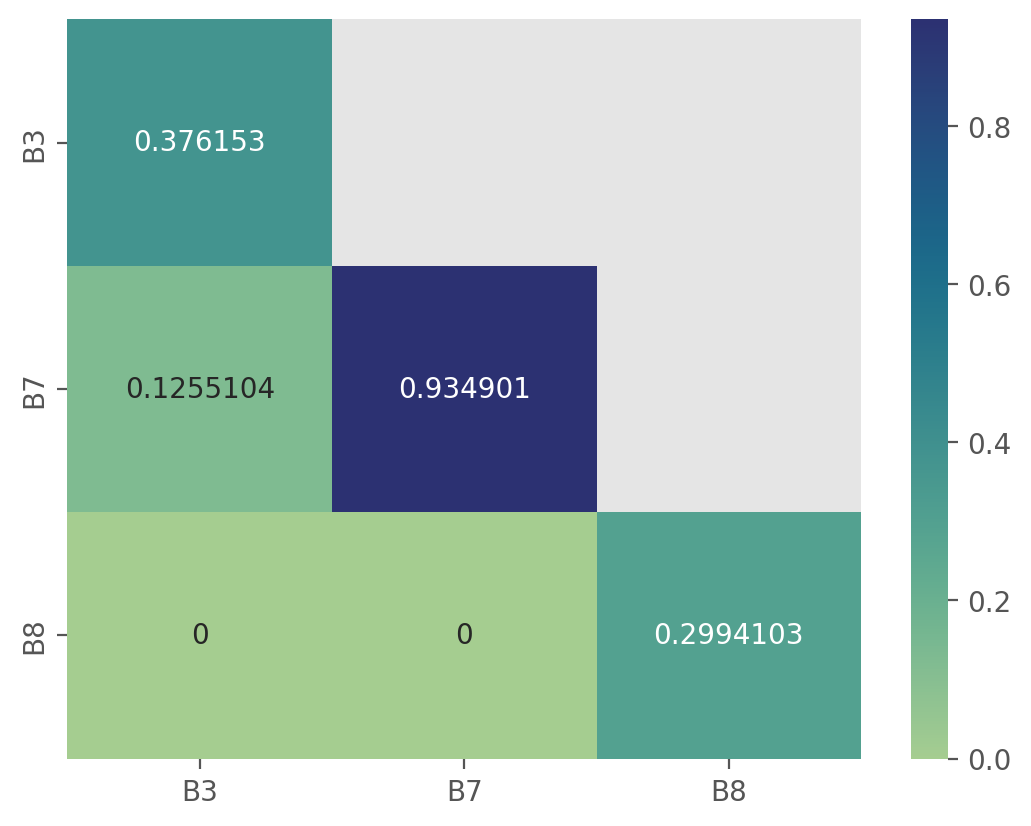

In [201]:
### TODO
# subset = [f'lost.{tag}' for tag in tags]
# display(df[subset].agg(['min', 'max', 'median', 'mean', 'sum']))
loss_r_dict = {}
for tag in tags:
    loss_r = round(sum(df[f'lost.{tag}']) / (len(df)+1e-9) * 100, 7)
    loss_r_dict[tag] = loss_r
print(loss_r_dict)
mat = fill_out_matrix(schemes, mtags, loss_r_dict)
### TODO END

display(mat)
ax = sns.heatmap(mat.T, annot=True, fmt='.7g', mask=mask(len(schemes)), cmap='crest')
plt.show()


## Excessive Latency Rate

{'B3': 0.3142017, 'B7': 0.2602587, 'B8': 0.3367106, 'B3.B7': 0.0253607, 'B3.B8': 0.0034024, 'B7.B8': 0.0332678}


,B3,B7,B8
B3,0.314202,0.025361,0.003402
B7,0.000000,0.260259,0.033268
B8,0.000000,0.000000,0.336711


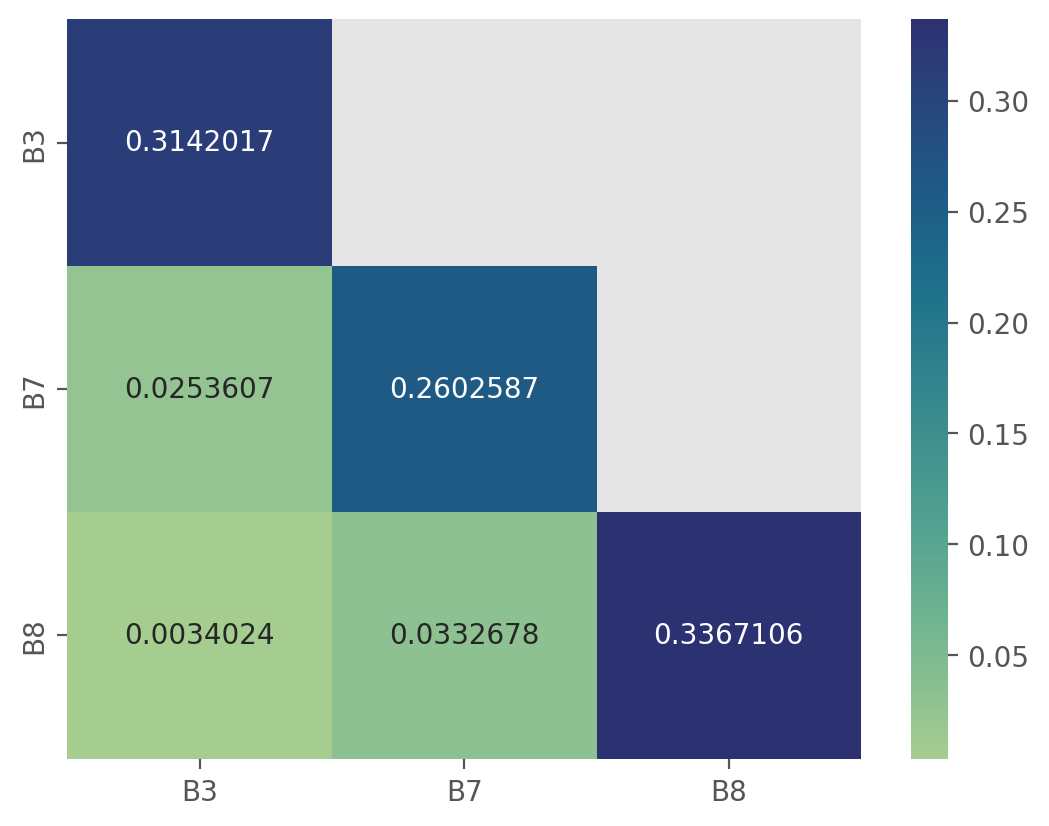

In [202]:
### TODO
# subset = [f'excl.{tag}' for tag in tags]
# display(df[subset].agg(['min', 'max', 'median', 'mean', 'sum']))
excl_r_dict = {}
for tag in tags:
    df_recv = df[df[f'lost.{tag}'] == False]
    excl_r = round(sum(df_recv[f'excl.{tag}']) / (len(df_recv)+1e-9) * 100, 7)
    excl_r_dict[tag] = excl_r
print(excl_r_dict)
mat = fill_out_matrix(schemes, mtags, excl_r_dict)
### TODO END

display(mat)
ax = sns.heatmap(mat.T, annot=True, fmt='.7g', mask=mask(len(schemes)), cmap='crest')
plt.show()

## Average Latency

{'B3': 0.030752, 'B7': 0.030319, 'B8': 0.03087, 'B3.B7': 0.028545, 'B3.B8': 0.028776, 'B7.B8': 0.028525}


,B3,B7,B8
B3,0.030752,0.028545,0.028776
B7,0.000000,0.030319,0.028525
B8,0.000000,0.000000,0.030870


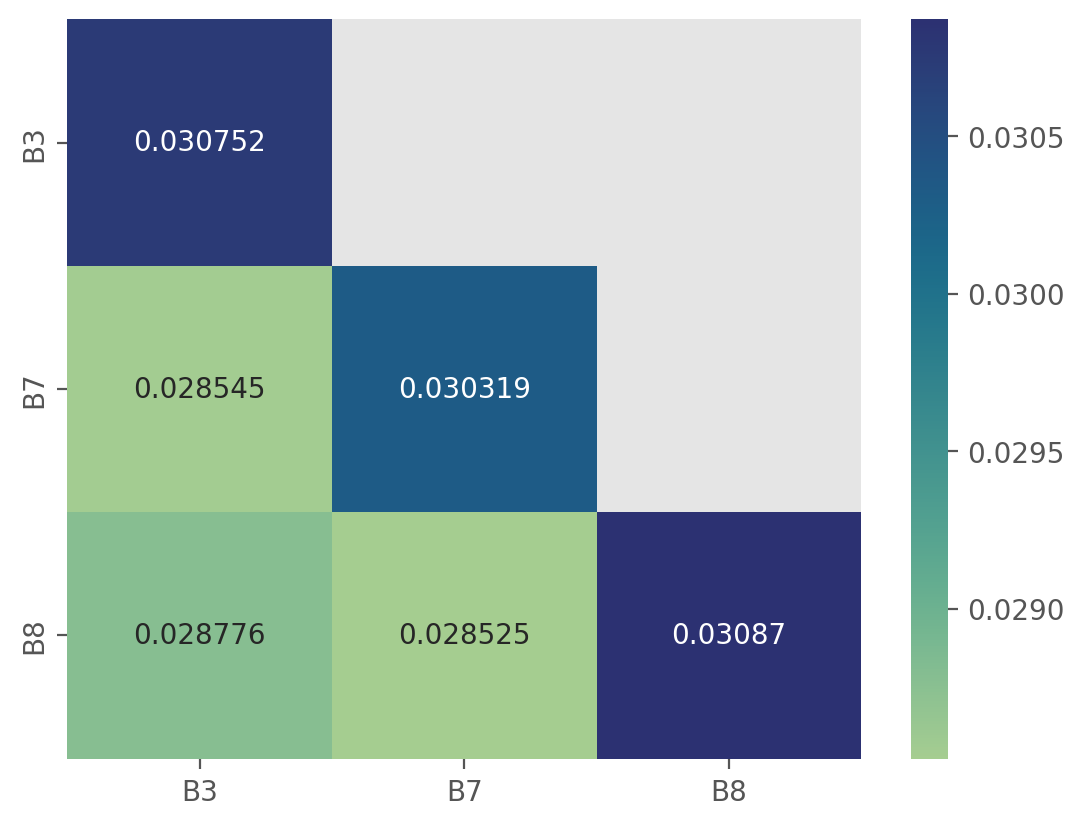

In [203]:
### TODO
# subset = [f'latency.{tag}' for tag in tags]
# display(df[subset].agg(['min', 'max', 'median', 'mean', 'sum']))
mean_latency_dict = {}
for tag in tags:
    df_recv = df[df[f'lost.{tag}'] == False]
    mean_latency = round(np.mean(df_recv[f'latency.{tag}']), 6)
    mean_latency_dict[tag] = mean_latency
print(mean_latency_dict)
mat = fill_out_matrix(schemes, mtags, mean_latency_dict)
### TODO END

display(mat)
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)), cmap='crest')
plt.show()

## Median Latency

{'B3': 0.030752, 'B7': 0.030319, 'B8': 0.03087, 'B3.B7': 0.028545, 'B3.B8': 0.028776, 'B7.B8': 0.028525}


,B3,B7,B8
B3,0.030103,0.028582,0.028810
B7,0.000000,0.030212,0.028513
B8,0.000000,0.000000,0.030483


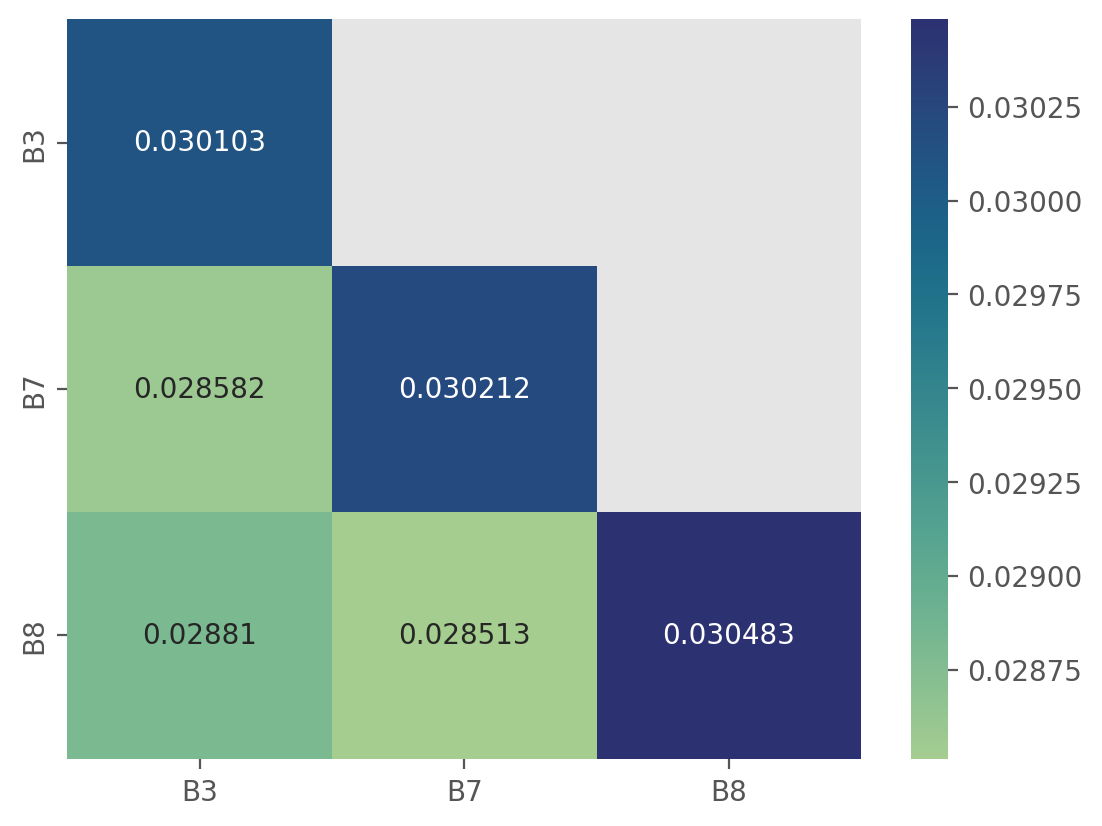

In [204]:
### TODO
# subset = [f'latency.{tag}' for tag in tags]
# display(df[subset].agg(['min', 'max', 'median', 'mean', 'sum']))
median_latency_dict = {}
for tag in tags:
    df_recv = df[df[f'lost.{tag}'] == False]
    median_latency = round(np.median(df_recv[f'latency.{tag}']), 6)
    median_latency_dict[tag] = median_latency
print(mean_latency_dict)
mat = fill_out_matrix(schemes, mtags, median_latency_dict)
### TODO END

display(mat)
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)), cmap='crest')
plt.show()

## Max Latency

{'B3': 0.030752, 'B7': 0.030319, 'B8': 0.03087, 'B3.B7': 0.028545, 'B3.B8': 0.028776, 'B7.B8': 0.028525}


,B3,B7,B8
B3,0.368318,0.210783,0.109780
B7,0.000000,0.284130,0.161285
B8,0.000000,0.000000,0.386242


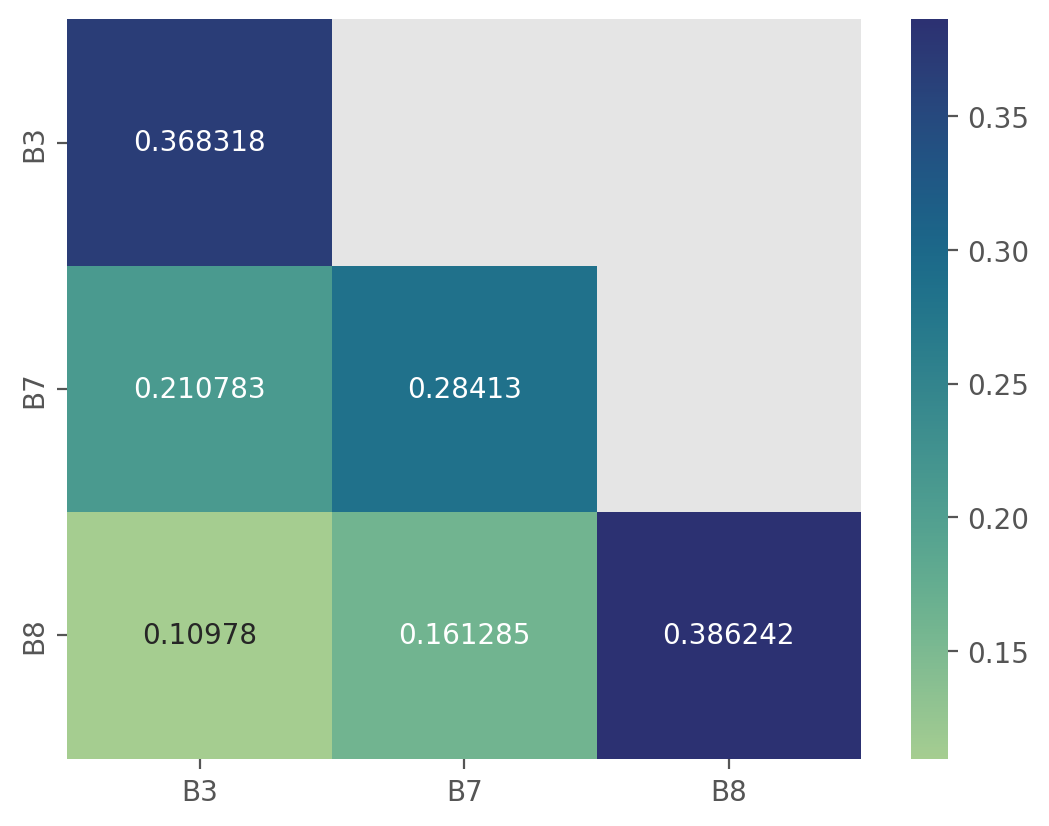

In [205]:
### TODO
# subset = [f'latency.{tag}' for tag in tags]
# display(df[subset].agg(['min', 'max', 'median', 'mean', 'sum']))
max_latency_dict = {}
for tag in tags:
    df_recv = df[df[f'lost.{tag}'] == False]
    max_latency = round(np.max(df_recv[f'latency.{tag}']), 6)
    max_latency_dict[tag] = max_latency
print(mean_latency_dict)
mat = fill_out_matrix(schemes, mtags, max_latency_dict)
### TODO END

display(mat)
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)), cmap='crest')
plt.show()

## Min Latency

{'B3': 0.030752, 'B7': 0.030319, 'B8': 0.03087, 'B3.B7': 0.028545, 'B3.B8': 0.028776, 'B7.B8': 0.028525}


,B3,B7,B8
B3,0.005484,0.003343,0.005484
B7,0.000000,0.003343,0.003343
B8,0.000000,0.000000,0.005638


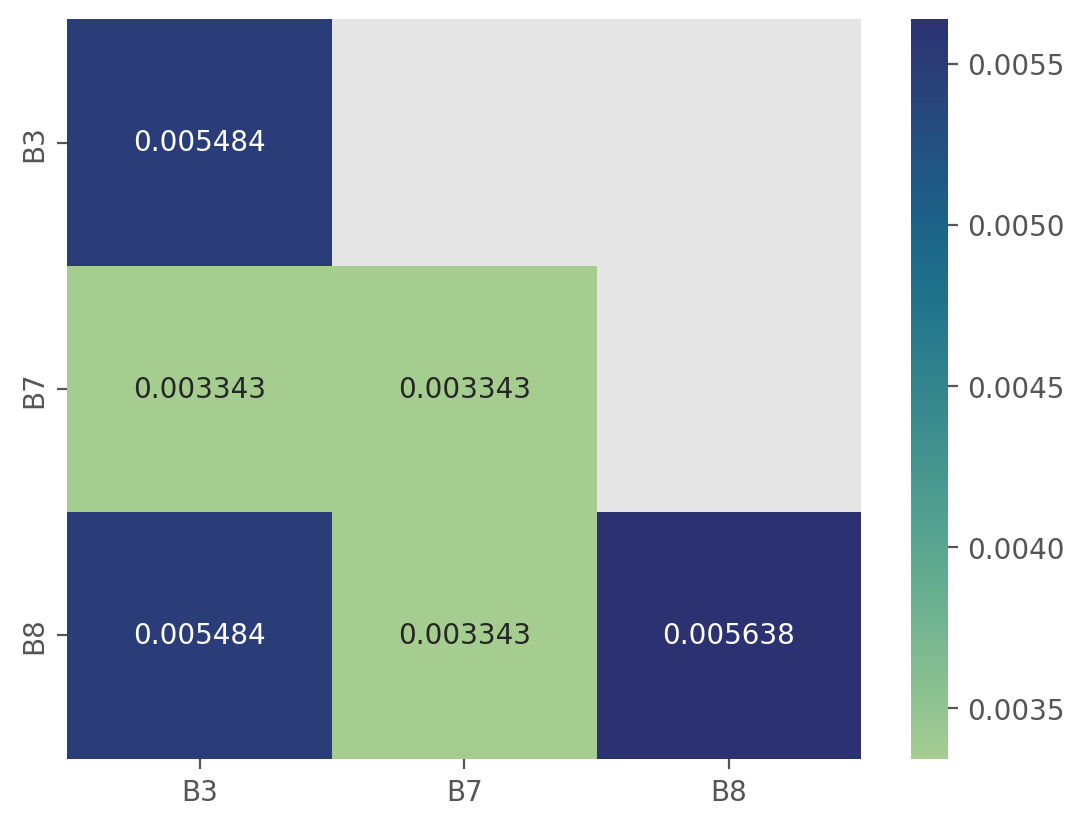

In [206]:
### TODO
# subset = [f'latency.{tag}' for tag in tags]
# display(df[subset].agg(['min', 'max', 'median', 'mean', 'sum']))
min_latency_dict = {}
for tag in tags:
    df_recv = df[df[f'lost.{tag}'] == False]
    min_latency = round(np.min(df_recv[f'latency.{tag}']), 6)
    min_latency_dict[tag] = min_latency
print(mean_latency_dict)
mat = fill_out_matrix(schemes, mtags, min_latency_dict)
### TODO END

display(mat)
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)), cmap='crest')
plt.show()